<a href="https://colab.research.google.com/github/HoaiNam52/NguyenHoaiNam_19146219_BT_AI/blob/main/Thucan_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Thucan/training_data',
                                               target_size=(100,100),
                                               batch_size=128,
                                               class_mode ='categorical',
                                               subset = 'training',
                                               shuffle = True)
validation_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Thucan/training_data',
                                               target_size=(100,100),
                                               batch_size=128,
                                               class_mode ='categorical',
                                               subset = 'validation',
                                               shuffle = True)
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Thucan/testing_data',
                                               target_size=(100,100),
                                               batch_size=128,
                                               class_mode ='categorical')

Found 450 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 0 images belonging to 0 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(training_set,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
4/4 [==============================] - 93s 20s/step - loss: 13.7585 - accuracy: 0.0933 - val_loss: 5.0987 - val_accuracy: 0.1000
Epoch 2/50
4/4 [==============================] - 28s 6s/step - loss: 3.6843 - accuracy: 0.0867 - val_loss: 2.3272 - val_accuracy: 0.1000
Epoch 3/50
4/4 [==============================] - 27s 6s/step - loss: 2.3254 - accuracy: 0.0978 - val_loss: 2.2922 - val_accuracy: 0.1000
Epoch 4/50
4/4 [==============================] - 27s 6s/step - loss: 2.2963 - accuracy: 0.1200 - val_loss: 2.2890 - val_accuracy: 0.2000
Epoch 5/50
4/4 [==============================] - 27s 7s/step - loss: 2.2830 - accuracy: 0.1111 - val_loss: 2.2800 - val_accuracy: 0.1000
Epoch 6/50
4/4 [==============================] - 27s 6s/step - loss: 2.2734 - accuracy: 0.1267 - val_loss: 2.2651 - val_accuracy: 0.2800
Epoch 7/50
4/4 [==============================] - 27s 6s/step - loss: 2.2414 - accuracy: 0.1733 - val_loss: 2.2364 - val_accuracy: 0.1600
Epoch 8/50
4/4 [================

In [6]:
model.save("Thucan_CNN.h5")

In [7]:
training_set.class_indices

{'Banh beo': 0,
 'Banh pia': 1,
 'Banh tet': 2,
 'Bun bo Hue': 3,
 'Ca kho to': 4,
 'Canh chua': 5,
 'Chao long': 6,
 'Com tam': 7,
 'Hu tieu': 8,
 'Pho': 9}

In [8]:
label = ['Banh beo', 'Banh pia', 'Banh tet', 'Bun bo Hue', 'Ca kho to', 'Canh chua', 'Chao long', 'Com tam', 'Hu tieu', 'Pho']

Banh beo


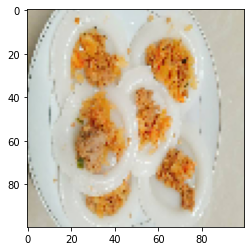

In [11]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('banhbeo.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])